**CÓDIGO 9: Ecuación de Schrodinger Independiente del Tiempo en 2D, Diferencias Finitas: Potencial Radial Lineal.**

In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
from scipy import sparse
import plotly.graph_objects as go
import plotly.io as pio

-Construcción del potencial

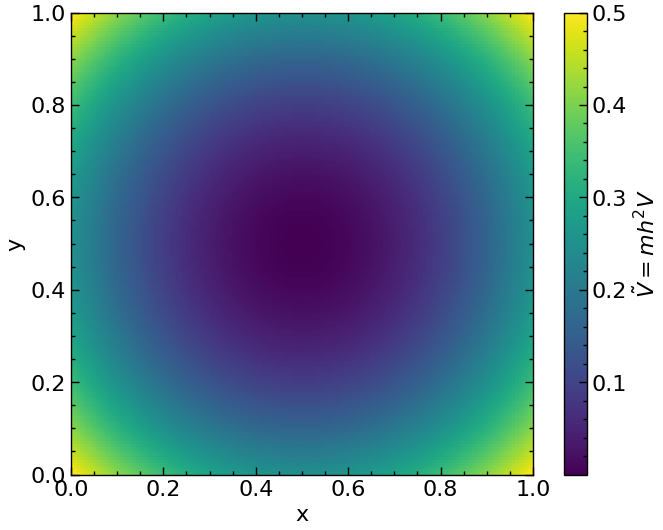

In [2]:
#Definimos el número de puntos de discretización N y creamos la malla de nodos.

N = 150
L=1
X, Y=np.meshgrid(np.linspace(0,L,N, dtype=float),np.linspace(0,L,N,dtype=float))

#Definimos el vector que discretiza el dominio [0,L]x[0,L]
y=np.linspace(0,L,N+1)

#Definimos el potencial Vtilda=mh^2V

def Vtilda(x,y):
    # Calculamos la distancia al centro
    r = np.sqrt((x-L/2)**2+(y-L/2)**2)
    return r**2


#Graficamos el potencial

V=Vtilda(X,Y)
plt.imshow(V, extent=[0, L, 0, L], origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label=r'$\tilde{V} = mh^2 V$')


-Construcción de la matriz hamiltoniana y cálculo de autovectores y autovalores.

In [3]:
#Construimos la matriz D' a la que operaré con el producto de Kronecker

diag= np.ones([N]) #Vector de 1s repetido dimensión N
diags=np.array([diag,-2*diag,diag]) #Vector de 1s -2s y 1s
D=sparse.spdiags(diags,np.array([-1,0,1]),N,N)
#La construcción de D' consiste en poner el vector diag en la posición -1 es decir en la diagonal inferior
#0 representa la posición de la diagonal principal (el vector -2*diags se coloca en la principal) y 1 la diagonal superior.
#Una sparse matrix es una matriz donde la mayoría de elementos son nulos y es útil utilizarla para almacenar y operar
#con sistemas grandes de ecuaciones pues sólamente almacenan los elementos no nulos.

#Construcción de la matriz cinética T y energía potencial U

T=-1/2*sparse.kronsum(D,D) #Matriz dispersa de tamaño N^2 x N^"2
U=sparse.diags(V.reshape(N**2),(0)) #Matriz despersa de tamaño N^2 x N^2 que coloca el vector V en la diagonal principal.

H=T+U

#Cálculo de autofunciones y autovalores

autovalores, autovectores = eigsh(H, k=20, which='SM')

#SM indica que se toman los 10 primeros autovalores más pequeños


-Gráfica de las densidades de probabilidad

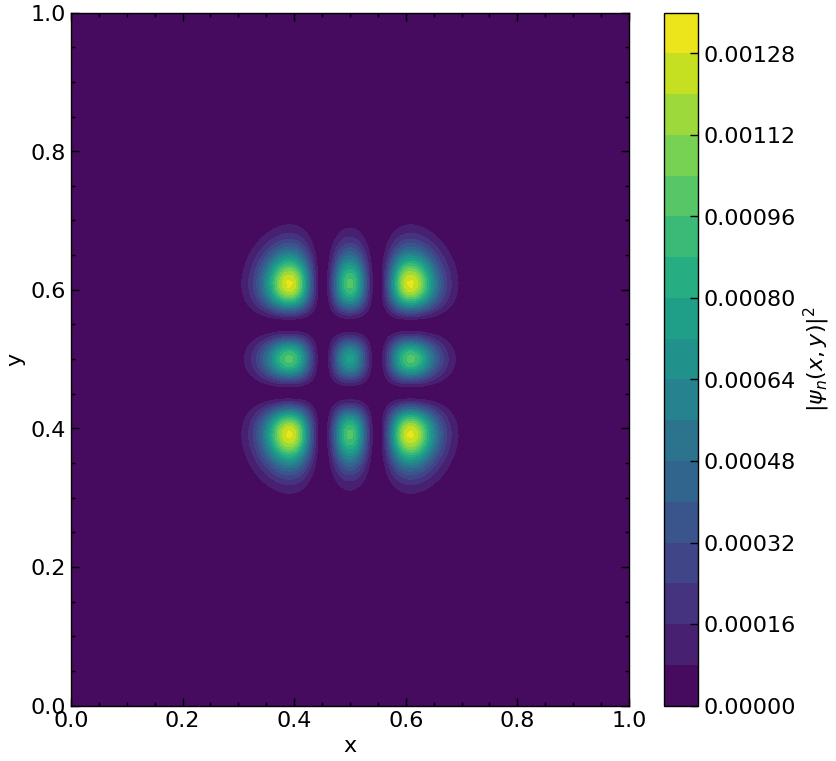

In [4]:
#Construimos una función que me obtenga las autofunciones para graficarlas

def autofunciones(n):
    return autovectores.T[n].reshape((N,N))

#n indica la n-ésima autofunción que buscamos
#los autovectores vienen dados en columnas, por tanto se hace la traspuesta para que estén en filas
#y posteriormente con reshape se vuelve a tener la bidimensionalidad pasando del vector a la matriz

#i es el iesimo autovector que se grafica
i=14

plt.figure(figsize=(9,9))
plt.contourf(X,Y,autofunciones(i)**2,20)
plt.xlabel(r'x')                    
plt.ylabel(r'y') 
plt.colorbar(label=r'$|\psi_{n}(x,y)|^2$')
plt.show()



In [5]:
pio.renderers.default = 'notebook'

# Crear figura de superficie 3D
fig = go.Figure(data=[go.Surface(z=autofunciones(i)**2, x=X, y=Y,colorscale='Viridis',
    colorbar=dict(title=r'|ψₙ|²'))])

# Mostrar figura (interactiva)
fig.show()



-Cálculo de los autovalores/energías propias

E_0 = 1.000000
E_1 = 1.999405
E_2 = 1.999405
E_3 = 2.997620
E_4 = 2.997620
E_5 = 2.998811
E_6 = 3.994643
E_7 = 3.994643
E_8 = 3.997026
E_9 = 3.997026


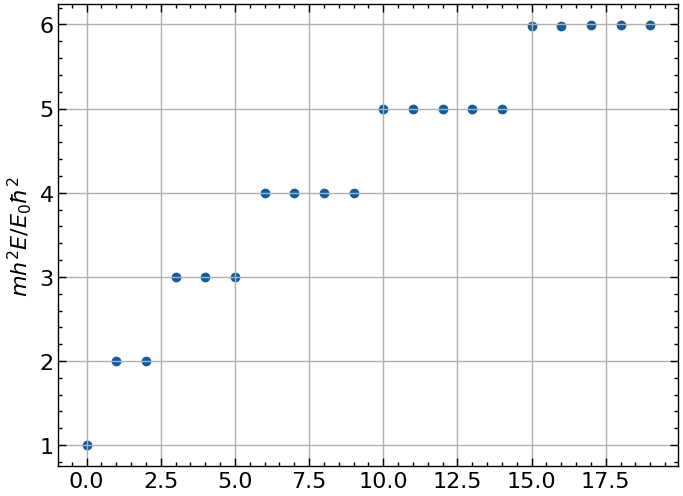

In [6]:
#Graficamos los 10 primeros autovalores

alpha = autovalores[0] #tomamos el autovalor más bajo
E_div_alpha = autovalores/alpha #normalizamos los autovalores (lo interesante no es el valor real sino las proporciones y degeneraciones)
indices = np.arange(0, len(autovalores), 1) #genera array [0,1,2,..]
plt.ylabel(r'$mh^2E/E_{0}\hbar^2$')
plt.scatter(indices, E_div_alpha)

#Mostramos los primeros 10 autovalores
for i in range(10):
    print(f'E_{i} = {E_div_alpha[i]:.6f}')

plt.grid(True)
